# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv]()

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vax_df = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')

In [3]:
vax_df %>% head

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
# create the df_vacc_rates here

df_vacc_rates = vax_df %>%
    filter(mmr >= 0) %>% 
    group_by(state) %>%
    summarize(obs = n(),
    n_above_95 = sum(mmr >= 95, na.rm = TRUE),
    frac_above_95 = sum(mmr >= 95, na.rm = TRUE) / n())

df_vacc_rates %>% head


state,obs,n_above_95,frac_above_95
<chr>,<int>,<int>,<dbl>
Arizona,1171,593,0.506404782
Arkansas,567,2,0.003527337
California,14225,12639,0.888506151
Colorado,1507,939,0.623092236
Connecticut,589,478,0.811544992
Illinois,7686,6893,0.896825397


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [5]:
df_vacc_rates %>%
    arrange(frac_above_95) %>% head(1)

state,obs,n_above_95,frac_above_95
<chr>,<int>,<int>,<dbl>
Arkansas,567,2,0.003527337


Make a ECDF plot of the school vaccination rates in North Carolina. Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [6]:
library("scales")

library('ggrepel')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




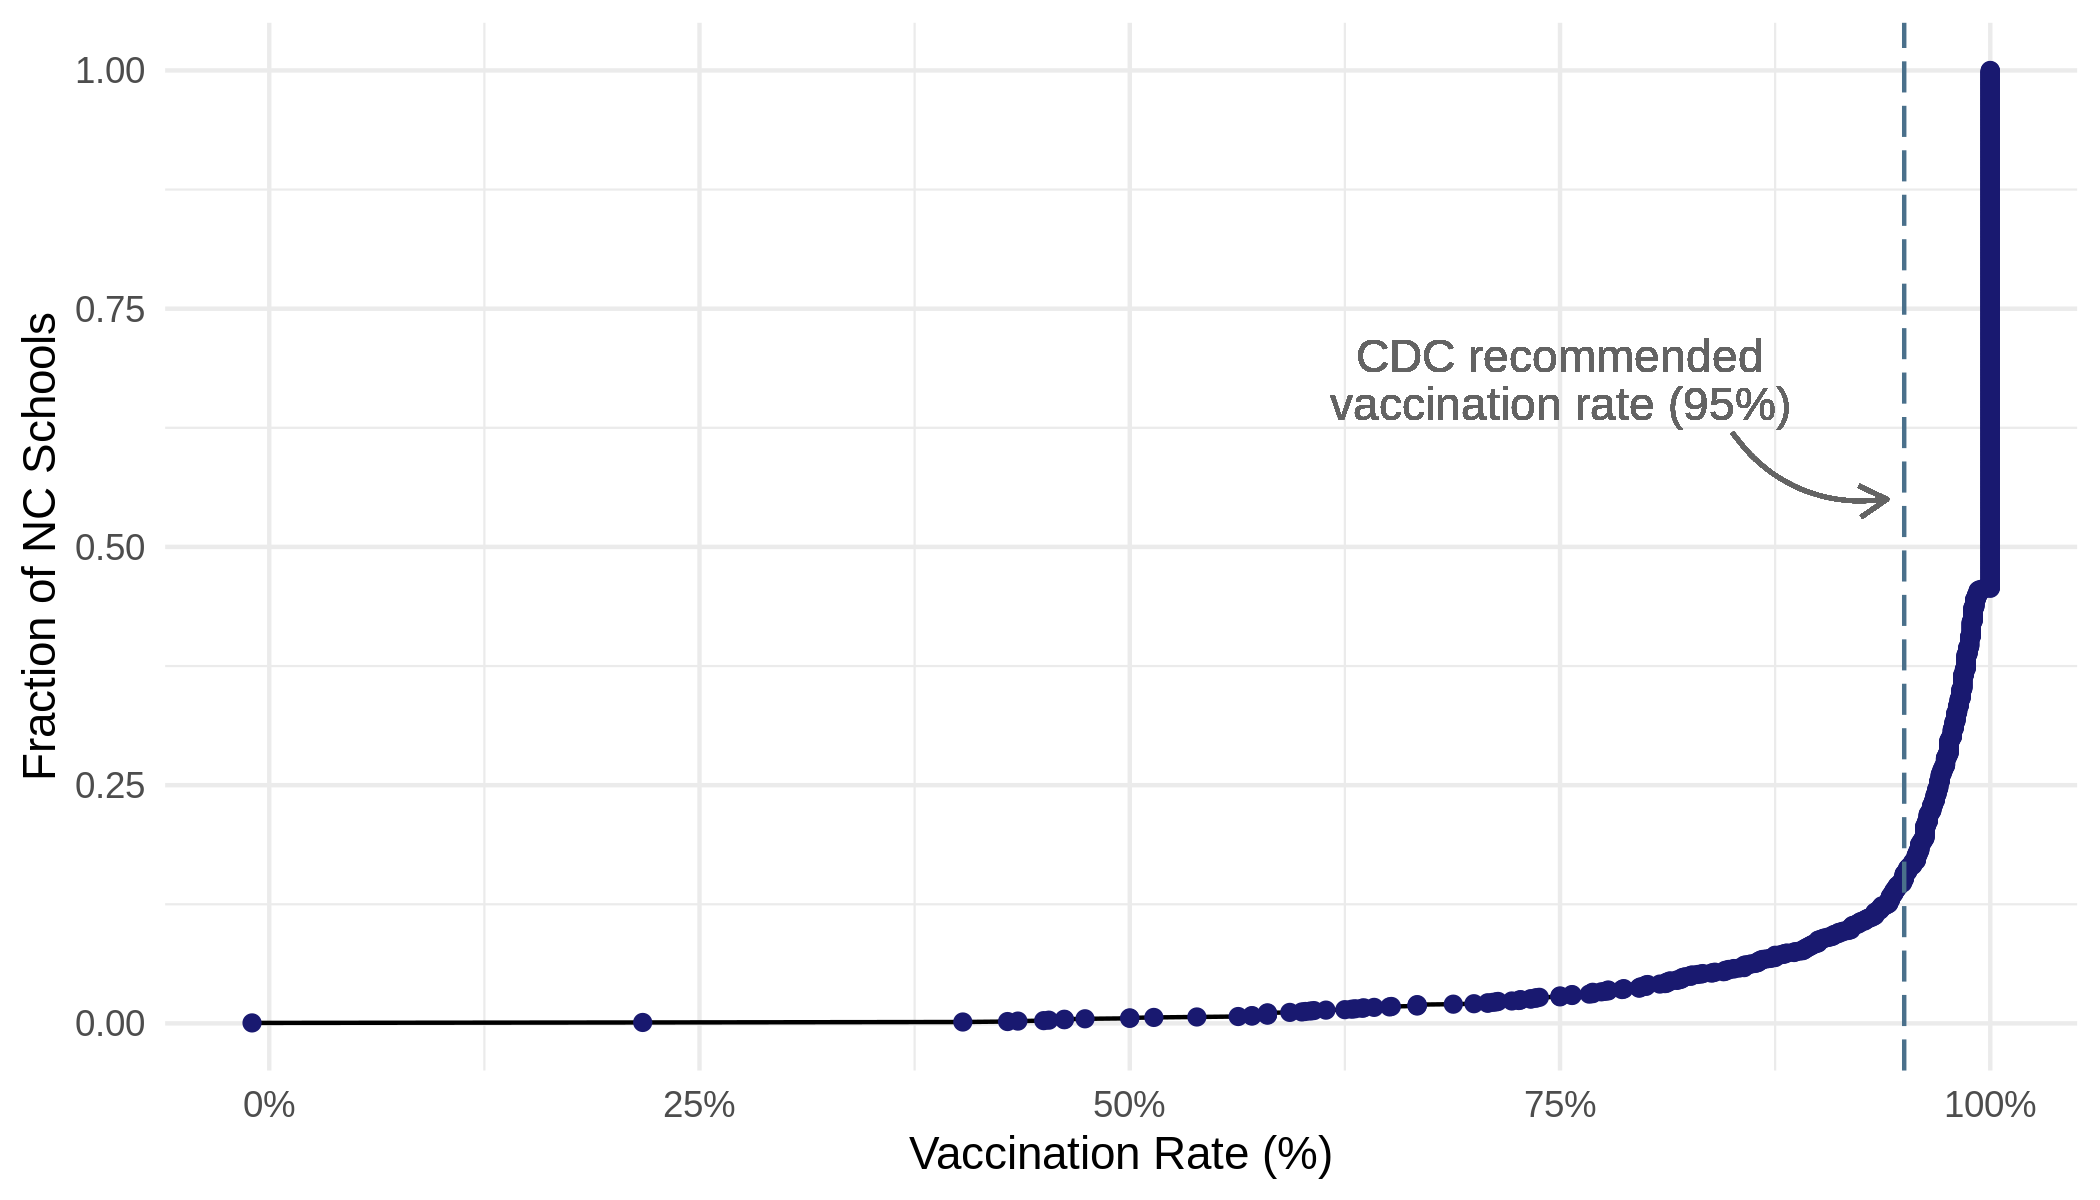

In [10]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)
df_nc_vax_rate = vax_df %>% 
    filter(state == 'North Carolina') %>%
    arrange(overall) %>%
    mutate(rn = row_number(), frac_overall = rn / n()) %>%
    select(state, overall, frac_overall)
p = ggplot(df_nc_vax_rate, aes(x = overall, y = frac_overall))
p = p + geom_line()
p = p + geom_point(color = "midnightblue")
p = p + geom_vline(xintercept = 95, 
                   color = "skyblue4", 
                   linetype = "longdash")
p = p + geom_text(label = "CDC recommended",x = 75, y = 0.7, color = "gray39")
p = p + geom_text(label = "vaccination rate (95%)", x = 75, y = 0.65, color = "gray39")
p = p + geom_curve(aes(x = 85, y = 0.62, xend = 94, yend = 0.55), 
             size=0.5, 
             curvature = 0.3,
             color = "gray39",
             arrow = arrow(length = unit(0.03, "npc")))
p = p + theme_minimal()
p = p + scale_x_continuous(labels = scales::label_percent(scale=1))
p = p + labs(x = "Vaccination Rate (%)", y = "Fraction of NC Schools")
p
    

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

 ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?
- yes from the graph, 50% of the schools have a vaccination rate of 100%, which is about the CDC recommended target of 95%

In [9]:

df_nc_vax_median = vax_df %>%
    filter(state == 'North Carolina', overall >= 0) %>%
    summarize(median_vax_rate = median(overall))

df_nc_vax_median


median_vax_rate
<dbl>
100
